In [ ]:
import json
import pandas as pd
import sklearn
import seaborn

df = pd.read_json('all_data_array.json')

In [ ]:
df.head()
df = df[df.branches_count != -1]
df = df[df.contributors_count != -1]
#df[['COL2', 'COL4']] = df[['COL2', 'COL4']].astype(int)

type_data = str(df.dtypes).split()
for i in xrange(0,len(type_data),2):
    column_name = type_data[i]
    column_type = type_data[i+1]
    if column_type == 'bool':
        df[column_name] = df[column_name].astype(int)

df.describe()

In [ ]:
df.name

In [5]:
df['is_legit'] = 1
non_legit = set()
for legit, name, lang ,counter in zip(df.is_legit, df.name, df.languages, range(df.languages.size)):
    if len(lang) == 0:
        non_legit.add(name)
        df.set_value(counter,'is_legit',0)
    counter += 1
non_legit

{u'AngularJS-Learning',
 u'Best-App',
 u'Front-end-Developer-Interview-Questions',
 u'HEAD',
 u'HowToBeAProgrammer',
 u'PokemonGo-Map',
 u'Projects',
 u'Qix',
 u'ToolsOfTheTrade',
 u'android-architecture',
 u'android-open-project',
 u'android-open-project-analysis',
 u'android_guides',
 u'angular-styleguide',
 u'awesome',
 u'awesome-android-ui',
 u'awesome-awesomeness',
 u'awesome-courses',
 u'awesome-cpp',
 u'awesome-design',
 u'awesome-electron',
 u'awesome-interview-questions',
 u'awesome-ios-ui',
 u'awesome-java',
 u'awesome-javascript',
 u'awesome-nodejs',
 u'awesome-osx-command-line',
 u'awesome-php',
 u'awesome-public-datasets',
 u'awesome-react',
 u'awesome-react-components',
 u'awesome-remote-job',
 u'awesome-ruby',
 u'awesome-shell',
 u'awesome-stock-resources',
 u'awesome-sysadmin',
 u'awesome-vue',
 u'awesome-wpo',
 u'blog',
 u'computer-science',
 u'css-modules',
 u'css-protips',
 u'deepdream',
 u'design',
 u'dive-into-machine-learning',
 u'docker-cheat-sheet',
 u'email-blu

In [10]:
df.columns

Index([      u'branches_count',        u'commits_count',
               u'contributors',   u'contributors_count',
                 u'created_at',          u'description',
                u'forks_count',        u'has_downloads',
               u'has_homepage',           u'has_issues',
                  u'has_pages',             u'has_wiki',
                         u'id', u'issue_comments_count',
                  u'languages',     u'milestones_count',
                       u'name',    u'open_issues_count',
           u'primary_language',       u'projects_count',
        u'pull_requests_count',        u'release_count',
                       u'size',          u'stars_count',
             u'watchers_count',             u'is_legit'],
      dtype='object')

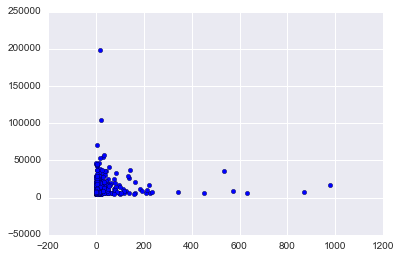

In [110]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge as lt
%matplotlib inline
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['branches_count'], df['stars_count'])
plt.show()

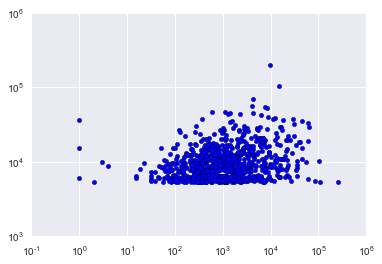

In [14]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df['commits_count'], df['stars_count'])
plt.show()

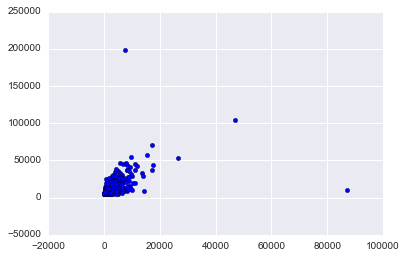

In [111]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['forks_count'], df['stars_count'])
plt.show()

#cdf fractions to analyze

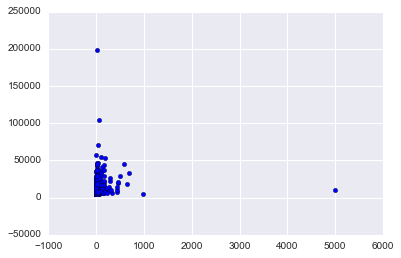

In [112]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['pull_requests_count'], df['stars_count'])
plt.show()

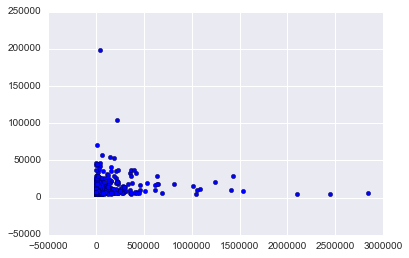

In [113]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['size'], df['stars_count'])
plt.show()

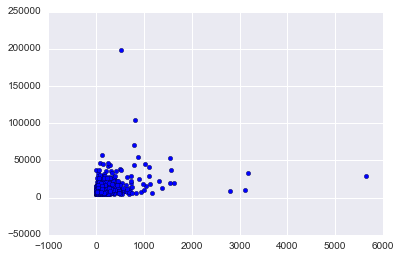

In [121]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['contributors_count'], df['stars_count'])
plt.show()

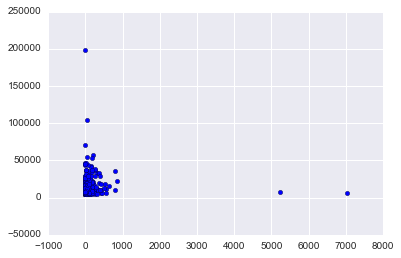

In [115]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['release_count'], df['stars_count'])
plt.show()

In [45]:
import numpy as np
df.columns
df.shape
df = df.reindex(np.random.permutation(df.index))

In [50]:
df.columns

Index([      u'branches_count',        u'commits_count',
               u'contributors',   u'contributors_count',
                 u'created_at',          u'description',
                u'forks_count',        u'has_downloads',
               u'has_homepage',           u'has_issues',
                  u'has_pages',             u'has_wiki',
                         u'id', u'issue_comments_count',
                  u'languages',     u'milestones_count',
                       u'name',    u'open_issues_count',
           u'primary_language',       u'projects_count',
        u'pull_requests_count',        u'release_count',
                       u'size',          u'stars_count',
             u'watchers_count',             u'is_legit'],
      dtype='object')

In [117]:
features = [ 'forks_count']
x_feature_train = df[features][:450]
y_feature_train = df['stars_count'][:450]
x_feature_test = df[features][450:]
y_feature_test = df['stars_count'][450:]
print x_feature.shape, y_feature.shape

(898, 1) (898,)


In [118]:
regr = lt()
regr.fit(x_feature_train, y_feature_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
print regr.intercept_, regr.coef_

6137.33864316 [ 2.35537387]


In [120]:
print regr.score(x_feature_test, y_feature_test)

-0.912746595839


In [109]:
df.head()

,branches_count,commits_count,contributors,contributors_count,created_at,description,forks_count,has_downloads,has_homepage,has_issues,...,name,open_issues_count,primary_language,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
239,52,1971,"[{u'repos': 33, u'id': 1140553, u'followers': ...",81,2013-04-09 16:02:18,LoopBack is an open source Node.js framework b...,733,1,1,1,...,loopback,527,JavaScript,0,29,112,10443,7753,7753,1
691,7,796,"[{u'repos': 81, u'id': 85566, u'followers': 40...",10,2011-01-01 05:20:00,:revolving_hearts: Filter & sort magical layouts,1264,1,1,1,...,isotope,21,JavaScript,0,1,49,2253,7653,7653,1
601,1,998,"[{u'repos': 192, u'id': 161631, u'followers': ...",127,2013-12-04 17:26:57,Lightweight Linux for Docker,781,1,0,1,...,boot2docker,382,Shell,0,20,107,2008,6398,6398,1
171,8,842,"[{u'repos': 36, u'id': 58962, u'followers': 31...",81,2014-04-04 13:54:37,Promises for Swift & ObjC,561,1,1,1,...,PromiseKit,15,Swift,0,5,108,4453,6375,6375,1
626,6,1524,"[{u'repos': 10, u'id': 1627211, u'followers': ...",43,2013-07-08 22:52:33,An image loading and caching library for Andro...,2506,1,0,1,...,glide,220,Java,0,3,19,26204,11859,11859,1


In [116]:
df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000,898.000000
mean,17.234967,4037.897550,158.375278,2291.994432,0.954343,0.678174,0.955457,0.355234,0.721604,1.576191e+07,1.516704,240.591314,0.259465,37.397550,64.027840,6.485151e+04,11094.739421,11094.739421,0.902004
std,63.189875,12353.407935,322.869780,4012.750466,0.208856,0.467437,0.206414,0.478851,0.448459,1.649912e+07,2.705593,537.714878,0.979468,180.420984,302.190078,2.034484e+05,10140.083277,10140.083277,0.297474
min,1.000000,1.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.314000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+01,5327.000000,5327.000000,0.000000
25%,2.000000,352.750000,30.000000,719.250000,1.000000,0.000000,1.000000,0.000000,0.000000,2.143211e+06,0.000000,26.000000,0.000000,4.000000,3.000000,2.440000e+03,6252.250000,6252.250000,1.000000
50%,4.000000,1003.500000,71.000000,1394.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.055169e+07,1.000000,84.000000,0.000000,13.000000,23.000000,9.376000e+03,8331.000000,8331.000000,1.000000
75%,10.000000,2799.750000,174.000000,2599.750000,1.000000,1.000000,1.000000,1.000000,1.000000,2.340553e+07,2.000000,225.750000,0.000000,33.000000,61.750000,4.371050e+04,12266.250000,12266.250000,1.000000
max,980.000000,252695.000000,5640.000000,87195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.090548e+07,30.000000,9148.000000,13.000000,5000.000000,7020.000000,2.842284e+06,197985.000000,197985.000000,1.000000


In [ ]:
# focus on one language